In [50]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt

In [51]:
def named_frame(frame: cv2.typing.MatLike, number: int) -> cv2.typing.MatLike:
    named_frame = frame.copy()
    cv2.putText(
        named_frame,
        str(number),
        (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (255, 255, 255),
        2,
        cv2.LINE_AA,
    )
    return named_frame

In [112]:
# Lviv human detect
video_path = "/home/michael/Stuff/ffmpeg-tutorial/videos/lex-33-lviv/lviv-2024-06-27/13:18/right_camera.mp4"
start_time_in_seconds = 5 * 60 + 4

# st. Alexius artifacts
# video_path = "/home/michael/Stuff/ffmpeg-tutorial/videos/lex-28-st_alexius/2024-07-10/2/left_camera.mp4"
# start_time_in_seconds = 25

# Lviv real sense artifacts
# video_path = "/home/michael/Stuff/ffmpeg-tutorial/videos/lex-33-lviv/lviv-2024-07-10/2/external.mp4"
# start_time_in_seconds = 1

# Lviv stairs humans
# video_path = "/home/michael/Stuff/ffmpeg-tutorial/videos/lex-33-lviv/lviv-2024-07-10/1/external.mp4"
# start_time_in_seconds = 8 * 60 + 27

cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
start_frame_number = int(start_time_in_seconds * fps)
cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame_number - 1)

current_frame_idx = start_frame_number
ret, previous_frame = cap.read()
# 4748
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        cv2.imshow("Frame", named_frame(frame, current_frame_idx))

        start_time = time.time()

        prev_gray = cv2.cvtColor(previous_frame, cv2.COLOR_RGB2GRAY)
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        #diff = cv2.subtract(gray, prev_gray)
        diff = np.abs(np.float32(gray) - np.float32(prev_gray))
        diff = np.uint8(diff)
        ret, diff_clear = cv2.threshold(diff, 50, 255, cv2.THRESH_BINARY)
        diff_clear = cv2.medianBlur(diff_clear, 3)
        amount_of_moving_pixels = len(diff_clear[diff_clear > 0])

        end_time = time.time()
        print(f"Run in {(end_time - start_time)*1000} ms")

        cv2.imshow("Diff", named_frame(np.clip(diff * 2, 0, 255), current_frame_idx))
        cv2.imshow("Clear Diff", named_frame(diff_clear, amount_of_moving_pixels))

        key = cv2.waitKey(0) & 0xFF
        if key == ord("q"):
            break
        elif key == 81:  # left arrow
            current_frame_idx -= 1
            cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame_idx)
        elif key == 83:  # right arrow
            current_frame_idx += 1

        previous_frame = frame
finally:
    cap.release()
    cv2.destroyAllWindows()

Run in 0.5979537963867188 ms
Run in 0.60272216796875 ms
Run in 0.6546974182128906 ms
Run in 0.5884170532226562 ms
Run in 0.6172657012939453 ms
Run in 0.6461143493652344 ms
Run in 1.4314651489257812 ms
Run in 0.6139278411865234 ms
Run in 0.5545616149902344 ms
Run in 0.7901191711425781 ms
Run in 0.6470680236816406 ms
Run in 0.5869865417480469 ms
Run in 0.6184577941894531 ms
Run in 1.0669231414794922 ms
Run in 0.8714199066162109 ms
Run in 0.6818771362304688 ms
Run in 0.5526542663574219 ms
Run in 1.0542869567871094 ms
Run in 0.5598068237304688 ms
Run in 0.6616115570068359 ms
Run in 0.5276203155517578 ms
Run in 0.6072521209716797 ms
Run in 0.7402896881103516 ms
Run in 0.759124755859375 ms
Run in 0.5412101745605469 ms
Run in 0.7891654968261719 ms
Run in 0.5502700805664062 ms
Run in 0.5671977996826172 ms
Run in 0.6940364837646484 ms
Run in 0.5335807800292969 ms
Run in 1.2450218200683594 ms
Run in 0.6756782531738281 ms
Run in 0.5624294281005859 ms
Run in 0.6937980651855469 ms
Run in 0.82445144

In [130]:
# Lviv human detect
# video_path = "/home/michael/Stuff/ffmpeg-tutorial/videos/lex-33-lviv/lviv-2024-06-27/13:18/right_camera.mp4"
# start_time_in_seconds = 5 * 60 + 4

# st. Alexius artifacts
video_path = "/home/michael/Stuff/ffmpeg-tutorial/videos/lex-28-st_alexius/2024-07-10/2/left_camera.mp4"
start_time_in_seconds = 25

# Lviv real sense artifacts
# video_path = "/home/michael/Stuff/ffmpeg-tutorial/videos/lex-33-lviv/lviv-2024-07-10/2/external.mp4"
# start_time_in_seconds = 1

# Lviv stairs humans
# video_path = "/home/michael/Stuff/ffmpeg-tutorial/videos/lex-33-lviv/lviv-2024-07-10/1/external.mp4"
# start_time_in_seconds = 8 * 60 + 27

IS_PIXEL_MOVING_THRESHOLD = 50
AMOUNT_OF_MOVING_PIXELS_THRESHOLD = 20

cap = cv2.VideoCapture(video_path)

current_frame_idx = 0
frame_indices = [current_frame_idx]
has_movement_vals = [False]
ret, previous_frame = cap.read()

start_time = time.time()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    current_frame_idx += 1

    prev_gray = cv2.cvtColor(previous_frame, cv2.COLOR_RGB2GRAY)
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    # diff = cv2.subtract(gray, prev_gray)
    diff = np.abs(np.float32(gray) - np.float32(prev_gray))
    diff = np.uint8(diff)
    ret, diff_clear = cv2.threshold(
        diff, IS_PIXEL_MOVING_THRESHOLD, 255, cv2.THRESH_BINARY
    )
    diff_clear = cv2.medianBlur(diff_clear, 3)
    amount_of_moving_pixels = len(diff_clear[diff_clear > 0])

    frame_indices.append(current_frame_idx)
    has_movement_vals.append(
        amount_of_moving_pixels > AMOUNT_OF_MOVING_PIXELS_THRESHOLD
    )

    previous_frame = frame

end_time = time.time()

video_time = cap.get(cv2.CAP_PROP_FRAME_COUNT) / cap.get(cv2.CAP_PROP_FPS)
processing_time = end_time - start_time

print("Video Time:", f"{video_time:.2f}s")
print("Proc Time:", f"{processing_time:.2f}s")

Video Time: 373.87s
Proc Time 6.99s


Ratio: 0.20613409415121256


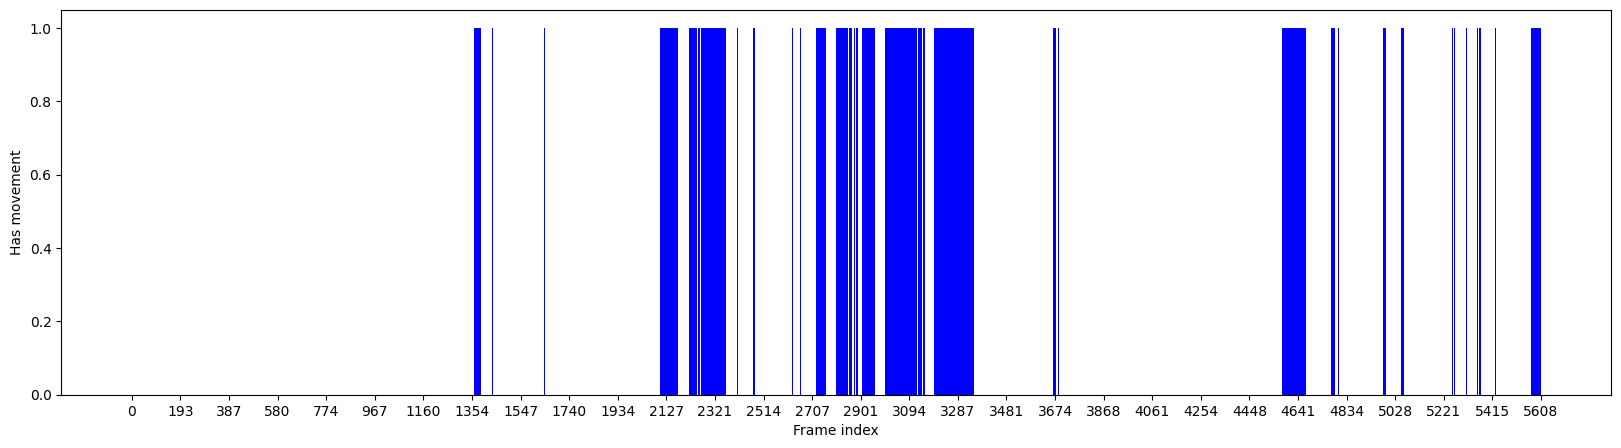

In [141]:
vals = np.array(has_movement_vals)
plt.figure(figsize=(20, 5))
plt.bar(frame_indices, has_movement_vals, color="blue")
plt.xlabel("Frame index")
plt.xticks(np.linspace(0, len(frame_indices), 30))
plt.ylabel("Has movement")
print("Ratio:", len(vals[vals > 0]) / len(vals))